# Metodos numericos

## Método punto medio

Es una técnica numérica para aproximar la integral definida de una función $f(x)$ en un intervalo $[a, b]$. Se basa en dividir el intervalo en $n$ subintervalos de igual longitud y evaluar la función en el punto medio de cada subintervalo.

La fórmula del método del punto medio es:

$$\int_{a}^{b} f(x) dx \approx \sum_{i=1}^{n} f\left(\frac{x_{i-1} + x_i}{2} \right) \Delta x$$

donde $\Delta x = \frac{b-a}{n}$ es la longitud de cada subintervalo.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def punto_medio(f, a, b, n):
    dx = (b - a) / n
    suma = 0
    x_mids = []
    y_mids = []
    for i in range(n):
        xi = a + (i + 0.5) * dx  # Punto medio del subintervalo
        x_mids.append(xi)
        y_mids.append(f(xi))
        suma += f(xi)
    return suma * dx, x_mids, y_mids

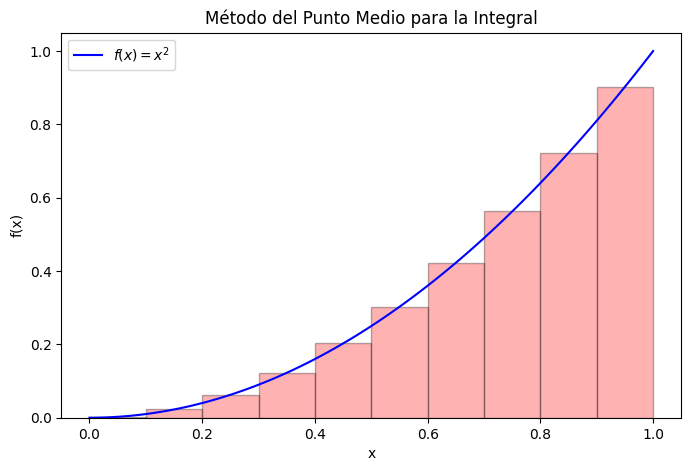

In [14]:
# Función de ejemplo
f = lambda x: x**2

# Parámetros de integración
a, b, n = 0, 1, 10
resultado, x_mids, y_mids = punto_medio(f, a, b, n)

# Graficar la función y los rectángulos del método del punto medio
x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color='blue')
plt.bar(x_mids, y_mids, width=(b-a)/n, alpha=0.3, color='red', edgecolor='black', align='center')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método del Punto Medio para la Integral")
plt.legend()
plt.show()

## Método trapecio

Es otra técnica numérica para aproximar la integral definida de una función $f(x)$ en un intervalo $[a, b]$. Se basa en aproximar el área bajo la curva mediante una serie de trapecios.

La fórmula del método del trapecio es:

$$\int_{a}^{b} f(x) dx \approx \frac{\Delta x}{2} \sum_{i=0}^{n} \left(f(x_i) + f(x_{i+1})\right)$$


donde $\Delta x = \frac{b-a}{n}$ es la longitud de cada subintervalo.



In [15]:
def trapecio(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (dx / 2) * np.sum(y[:-1] + y[1:])
    return integral, x, y

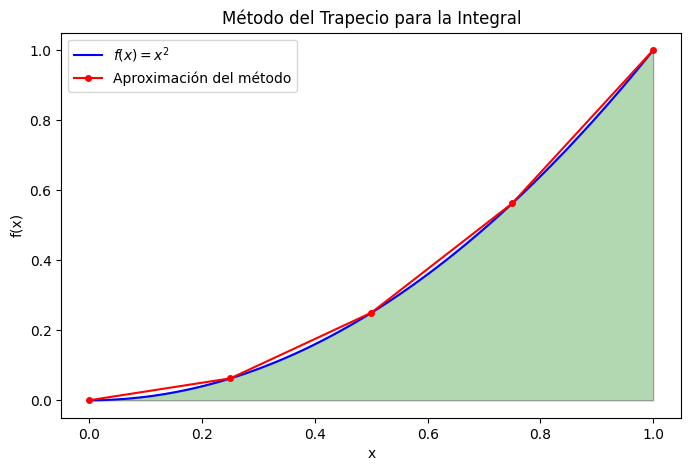

In [19]:
# Función de ejemplo
f = lambda x: x**2

# Parámetros de integración
a, b, n = 0, 1, 4
resultado, x_tra, y_tra = trapecio(f, a, b, n)

x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, f(x_vals), label='$f(x) = x^2$', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='green', edgecolor='black')
plt.plot(x_tra, y_tra, 'ro-', markersize=4, label='Aproximación del método')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método del Trapecio para la Integral")
plt.legend()
plt.show()

## Método de Simpson

Es otra técnica numérica para aproximar la integral definida de una función $f(x)$ en un intervalo $[a, b]$. Se basa en aproximar el área bajo la curva mediante una combinación de parábolas.

La fórmula del método de Simpson es:


$$\int_{a}^{b} f(x) dx \approx \frac{\Delta x}{3} \sum_{i=0}^{n} \left(f(x_i) + 4f(x_{i+1}) + f(x_{i+2})\right)$$

donde $\Delta x = \frac{b-a}{n}$ es la longitud de cada subintervalo.

Nota: el método explicado en este colab solo considera una partición par del intervalo. Se puede plantear una partición impar pero el método debe ser modificado.


In [20]:
import numpy as np

def simpson(f,a,b,N):

    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S, x, y

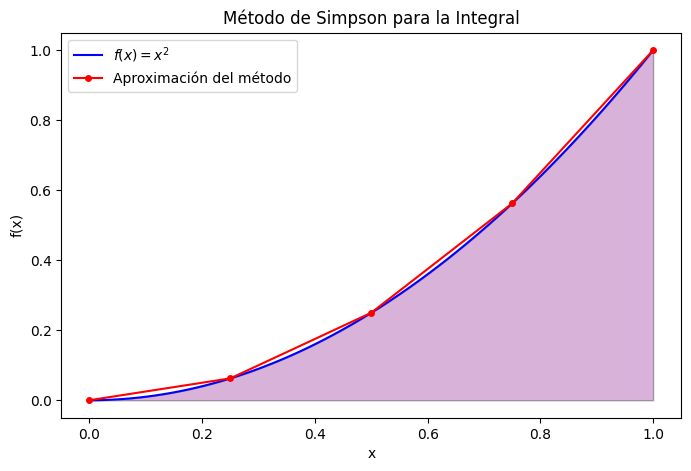

In [21]:
# Función de ejemplo
f = lambda x: x**2

# Parámetros de integración
a, b, n = 0, 1, 4
resultado, x_sim, y_sim = simpson(f, a, b, n)

x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)



plt.figure(figsize=(8,5))
plt.plot(x_vals, f(x_vals), label='$f(x) = x^2$', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='purple', edgecolor='black')
plt.plot(x_sim, y_sim, 'ro-', markersize=4, label='Aproximación del método')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método de Simpson para la Integral")
plt.legend()
plt.show()